In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

# Optimization

In [ ]:
from scipy.optimize import minimize

Minimize $ f(x) = (x-3)^2 $

In [20]:
def f(x):
    return (x - 3) ** 2

result = minimize(f, 2)

In [21]:
print(result.x[0])

2.999999992549203


Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [24]:
f = lambda x: (x[0] - 1) ** 2 + (x[1] - 2.5) ** 2
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: - x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: - x[0] + 2 * x[1] + 2})
bnds = ({0, None}, {0, None})
result = minimize(f, (2, 0), bounds = bnds, constraints = cons)

In [26]:
print(result.x)

[1.4 1.7]


Note use of different techniques for different problems

In [29]:
#minimize?

# Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect x and y by means of some experiment)

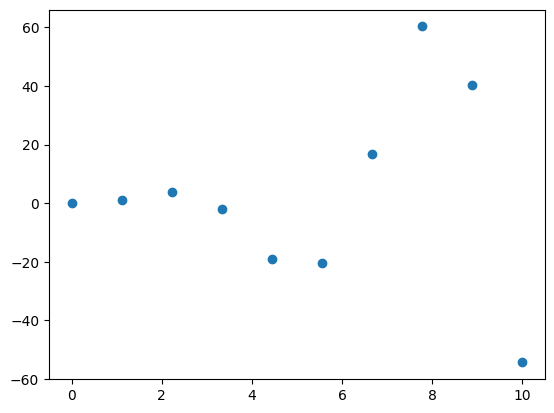

In [31]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [33]:
from scipy.interpolate import interp1d

In [40]:
f = interp1d(x, y, kind = 'cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

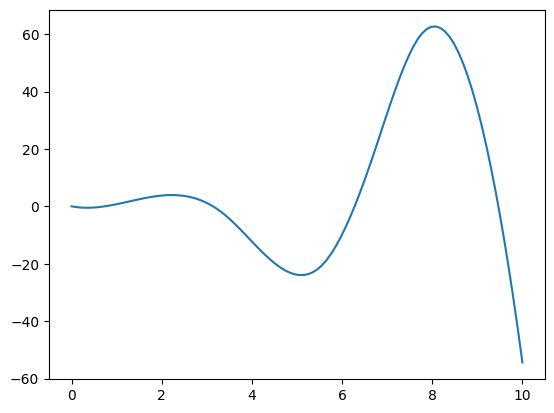

In [41]:
plt.plot(x_dense, y_dense)

# Curve Fitting

Trivial Example

In [42]:
x_data = np.linspace(0, 10, 10)
y_data = 3 * (x_data ** 2) + 2

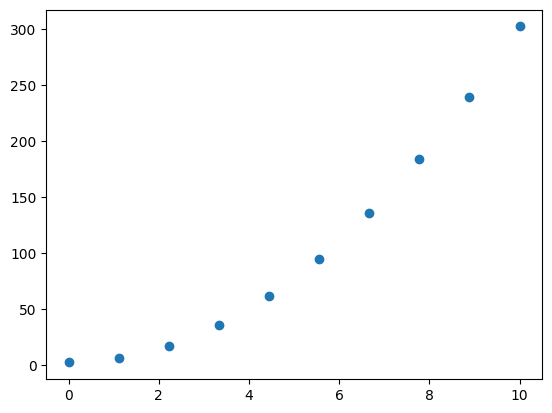

In [43]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $ y=ax^2+b $. The main goal here is to determine the values of $ a $ and $ b $.

In [44]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x ** 2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0 = (1, 1))

In [47]:
popt

array([3., 2.])

The equation for a spring motion is $ y(t)=A\cos(\omega t+\phi) $. Qant to find the natural frequency of oscillation $ \omega $ for the spring. You collect the data.

In [48]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

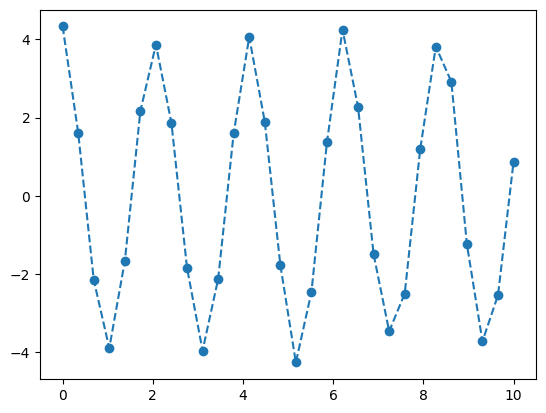

In [49]:
plt.plot(t_data, y_data, 'o--')

$ \omega =2\pi f, f=1/T,$ and $ T \approx 2 $ seconds. Thus good initial guess is

* $ \omega =2\pi (1/2) = \pi $
* $ A = 4 $
* $ \phi = 0 $

In [71]:
def func(x, A, w, phi):
    return A * np.cos(w * x + phi)

popt, pcov = curve_fit(func, t_data, y_data, p0 = (4, np.pi, 0))

In [72]:
A, w, phi = popt

In [73]:
w

np.float64(2.998995209546495)

In [74]:
np.diag(pcov)

array([2.61882717e-03, 1.85638064e-05, 6.63424524e-04])

In [75]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

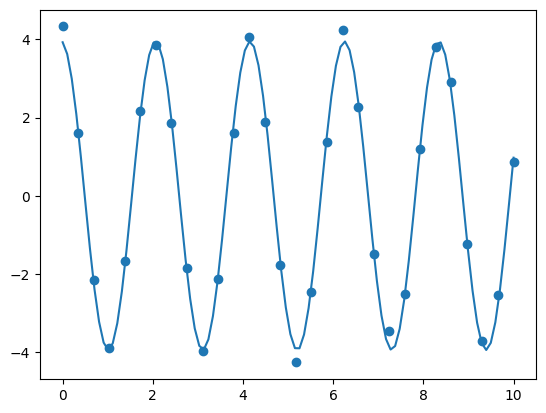

In [76]:
plt.scatter(t_data, y_data)
plt.plot(t, y)

The parameters

In [77]:
popt

array([3.94836218, 2.99899521, 0.10411349])

The estimated error on the parameters

In [78]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575703])

# Special Functions

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

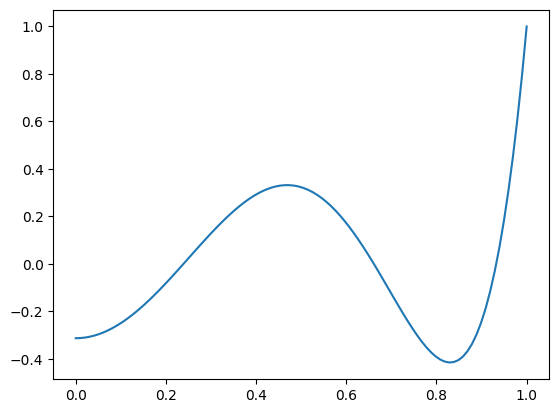

In [83]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

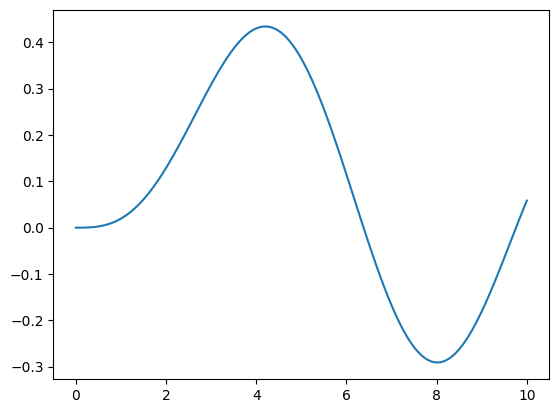

In [85]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()